In [91]:
# load k_lines

from datetime import date, timedelta
from binance.binance_k_line_repository import load_k_lines

interval_days = 7 * 4
interval_minutes = interval_days * 24 * 60
interval_date_from: date = date.today() - timedelta(days=3 + interval_days - 1)
interval_date_to: date = date.today() - timedelta(days=3)

symbol: str = "ETHUSDT"

k_lines = load_k_lines(symbol, interval_date_from, interval_date_to)

display(k_lines)

,open_timestamp_millis,open_price,high_price,low_price,close_price,volume,close_timestamp_millis,quote_asset_volume,trades_count,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1682985600000,1829.97,1830.08,1829.11,1829.20,3339.621,1682985659999,6.110053e+06,2756,1344.134,2.459176e+06,0
1,1682985660000,1829.19,1829.21,1828.72,1829.11,2825.316,1682985719999,5.167516e+06,2628,1201.682,2.197851e+06,0
2,1682985720000,1829.10,1829.98,1829.10,1829.21,1577.436,1682985779999,2.885865e+06,2046,860.998,1.575226e+06,0
3,1682985780000,1829.20,1829.46,1828.47,1828.49,1341.256,1682985839999,2.452863e+06,1409,384.159,7.025891e+05,0
4,1682985840000,1828.50,1828.89,1828.46,1828.46,702.664,1682985899999,1.284997e+06,951,289.805,5.299653e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1685404500000,1891.76,1892.37,1891.75,1892.37,1465.613,1685404559999,2.772939e+06,924,1275.371,2.413016e+06,0
1436,1685404560000,1892.37,1892.51,1891.69,1891.69,649.350,1685404619999,1.228717e+06,753,194.772,3.685513e+05,0
1437,1685404620000,1891.69,1891.70,1891.40,1891.40,313.432,1685404679999,5.928521e+05,477,134.275,2.539755e+05,0
1438,1685404680000,1891.41,1891.70,1891.40,1891.53,320.283,1685404739999,6.058215e+05,508,186.007,3.518262e+05,0


In [92]:
# filter raw data

import pandas as pd

k_lines.index = pd.to_datetime(k_lines["open_timestamp_millis"], unit="ms")
k_lines.index.name = 'open_datetime'
k_lines = k_lines[
    ["open_price", "low_price", "high_price", "close_price"]
]

k_lines

,open_price,low_price,high_price,close_price
open_datetime,,,,
2023-05-02 00:00:00,1829.97,1829.11,1830.08,1829.20
2023-05-02 00:01:00,1829.19,1828.72,1829.21,1829.11
2023-05-02 00:02:00,1829.10,1829.10,1829.98,1829.21
2023-05-02 00:03:00,1829.20,1828.47,1829.46,1828.49
2023-05-02 00:04:00,1828.50,1828.46,1828.89,1828.46
...,...,...,...,...
2023-05-29 23:55:00,1891.76,1891.75,1892.37,1892.37
2023-05-29 23:56:00,1892.37,1891.69,1892.51,1891.69
2023-05-29 23:57:00,1891.69,1891.40,1891.70,1891.40


In [93]:
# validate filtered raw data

from numpy import float16, float64


assert len(k_lines) == interval_minutes

assert len(k_lines[k_lines.isna().any(axis=1)]) == 0
assert len(k_lines[k_lines.isnull().any(axis=1)]) == 0

assert k_lines.dtypes["open_price"] == float64
assert len(k_lines[k_lines["open_price"] < 0]) == 0

assert k_lines.dtypes["low_price"] == float64
assert len(k_lines[k_lines["low_price"] < 0]) == 0

assert k_lines.dtypes["high_price"] == float64
assert len(k_lines[k_lines["high_price"] < 0]) == 0

assert k_lines.dtypes["close_price"] == float64
assert len(k_lines[k_lines["close_price"] < 0]) == 0

# TODO check ordering and increment == 1

<Axes: xlabel='open_datetime'>

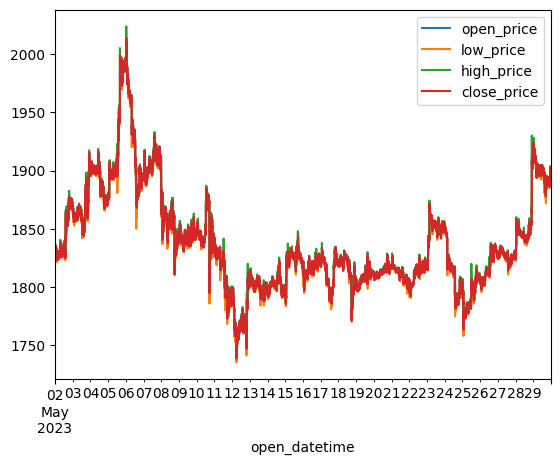

In [94]:
# Prices plot

k_lines.plot.line(use_index=True)